# OpenCV


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2  

print("OpenCV Version : %s " % cv2.__version__)



OpenCV Version : 3.3.1 


 https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html

### 1. Image processing

Load the 'coins' image. Experiment with the tools discussed in class (histograms, thresholding, morphological operators, etc.) to label each coin with a unique label. Mark each coin with a unique color.

Show all intermediate steps along the way.

Count the number of pixels of each coin (its area) and mark the center of each coin.


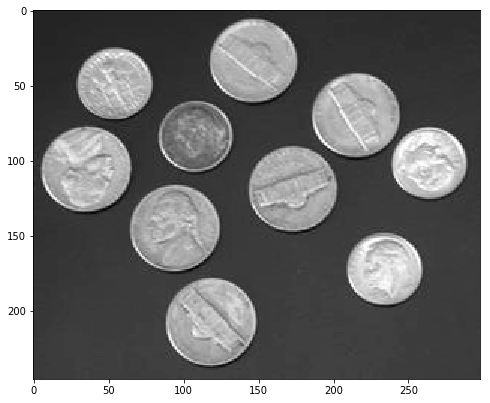

In [2]:
coins = cv2.imread('coins.jpg',0)

plt.figure(figsize=(8,8))
plt.imshow(coins, cmap='gray')
plt.show()

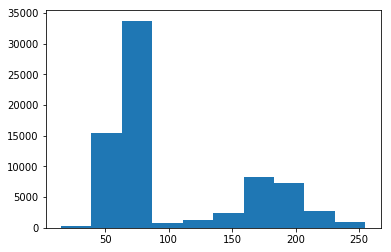

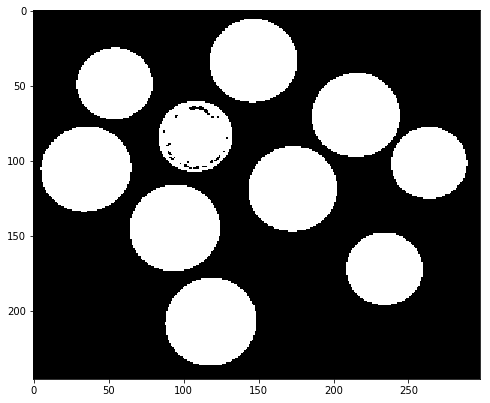

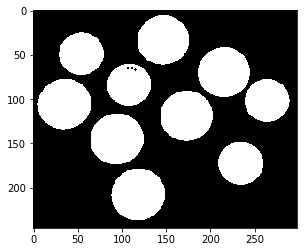


colors = 11  => coins = 10


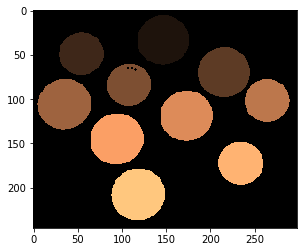

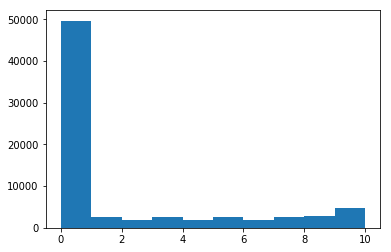


count of each coin pixels
 [(1, 2564.0), (2, 1896.0), (3, 2604.0), (4, 1826.0), (5, 2696.0), (6, 1909.0), (7, 2653.0), (8, 2731.0), (9, 4737.0)]

coins colors
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


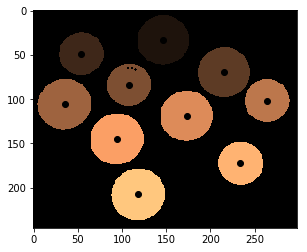

In [3]:
plt.hist(coins.flatten())
plt.show()

kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],dtype=np.uint8)
coins_th = cv2.threshold(coins,100,1,cv2.THRESH_BINARY)[1]
plt.figure(figsize=(8,8))

plt.imshow(coins_th,cmap = 'gray')
plt.show()

coins_c = cv2.morphologyEx(coins_th, cv2.MORPH_CLOSE, kernel)

plt.imshow(coins_c,cmap = 'gray')
plt.show()

count_color, labels = cv2.connectedComponents(coins_c)
print('\ncolors =',count_color,' => coins =',count_color - 1)
plt.imshow(labels,cmap = plt.cm.copper)
plt.show()

count = plt.hist(labels.flatten())[0]
plt.show()

count_dict = [(i[0]+1,i[1]) for i in enumerate(count[1:])]
print('\ncount of each coin pixels\n',count_dict)

coins_color = list(set(labels.flatten()))[1:]
print('\ncoins colors\n',coins_color)

# find center based on the max distance between two pixels with same color
center = np.zeros((2,len(coins_color)))
for i in range(len(coins_color)):
    (y,x) = np.nonzero(labels == coins_color[i])
    center[0][i] = np.linspace(x.min(),x.max(),3)[1] # center x
    center[1][i] = np.linspace(y.min(),y.max(),3)[1] # center y

plt.imshow(labels,cmap = plt.cm.copper)
plt.plot(center[0],center[1],'ro',color = 'black')
plt.show()


### 2. Canny Edges

Load the 'x-ray' image. Apply Canny edge detection (tune the paramers until you are satisfied with the results).

If you wish, you can try to add interactive sliders to play with the parameters:
http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html


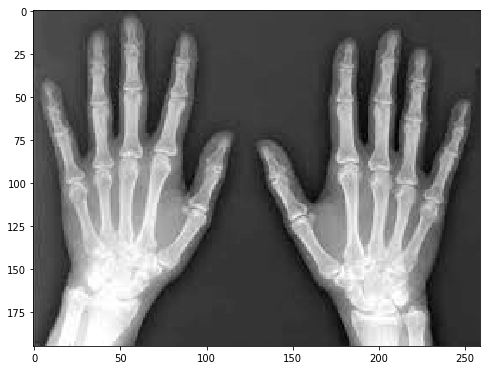

In [4]:
xray = cv2.imread('xray.jpeg',0)

plt.figure(figsize=(8,8))
plt.imshow(xray, cmap='gray')
plt.show()



IntSlider(value=50, continuous_update=False, description='low', max=200, min=10)

IntSlider(value=250, continuous_update=False, description='high', max=300, min=200)

low = 120 , high = 300


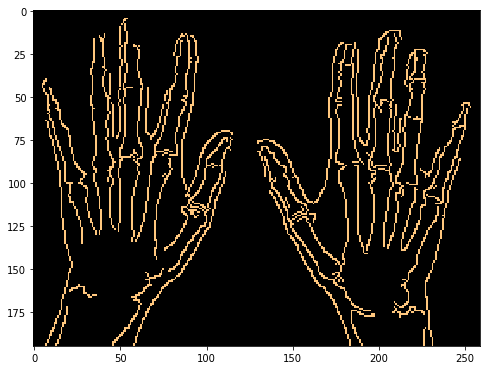

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

low_th=widgets.IntSlider(min=10,max=200,step=1,value=50,description="low",continuous_update=False)
display(low_th)
high_th=widgets.IntSlider(min=200,max=300,step=1,value=250,description="high",continuous_update=False)
display(high_th)



low = 120
high = 300

def canny(img,low,high):
    print('low =',low,', high =',high)
    xray_edges = cv2.Canny(img,low,high)
    plt.figure(figsize=(8,8))
    plt.imshow(xray_edges,cmap = 'copper')
    plt.show()
    
def on_value_change_low(change):
    low = change['new']
    canny(xray,low,high)
    
def on_value_change_high(change):
    high = change['new']
    canny(xray,low,high)
    
low_th.observe(on_value_change_low, names='value')
high_th.observe(on_value_change_high, names='value')
    
canny(xray,low,high)



### 3. Feature matching

Load the 'clutteredDesk' image and the two smaller query images (taken from a different view points). Calculate SIFT keypoints in all images, and try to find good matches. Mark the matches on the big image, with different color for each query image. 


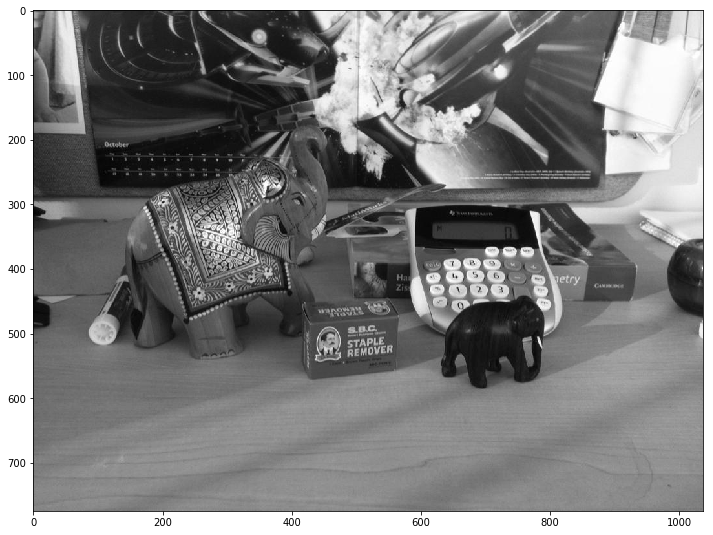

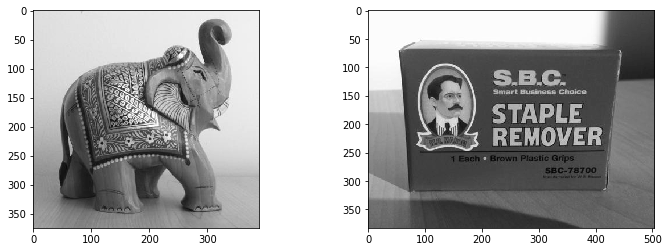

In [6]:
img = cv2.imread('clutteredDesk.jpg',0)
q1 = cv2.imread('elephant.jpg',0)
q2 = cv2.imread('stapleRemover.jpg',0)


plt.figure(figsize=(12,12))
plt.imshow(img, cmap='gray')
plt.show()


plt.figure(figsize=(12,4))
plt.subplot(1,2,1),plt.imshow(q1, cmap='gray')
plt.subplot(1,2,2),plt.imshow(q2, cmap='gray')
plt.show()



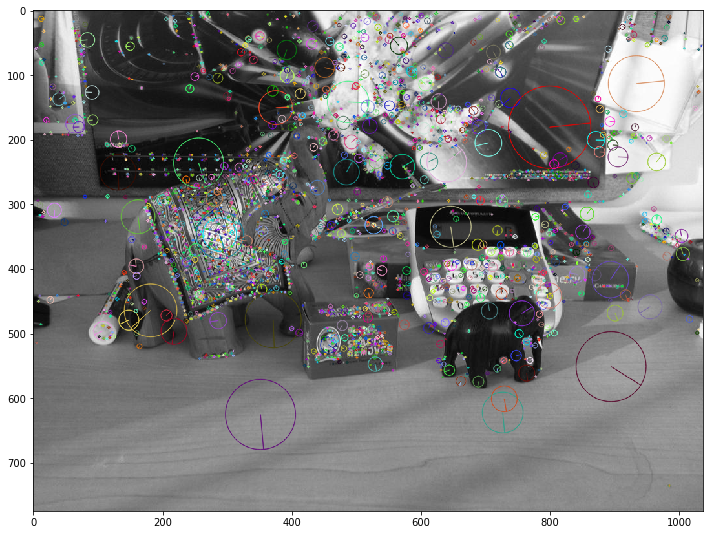

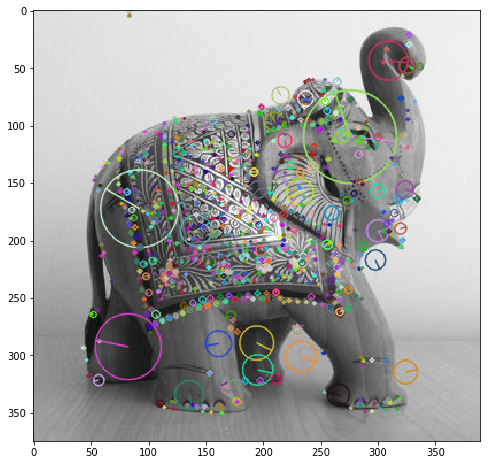

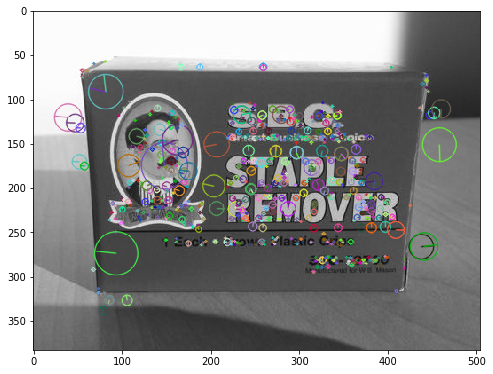

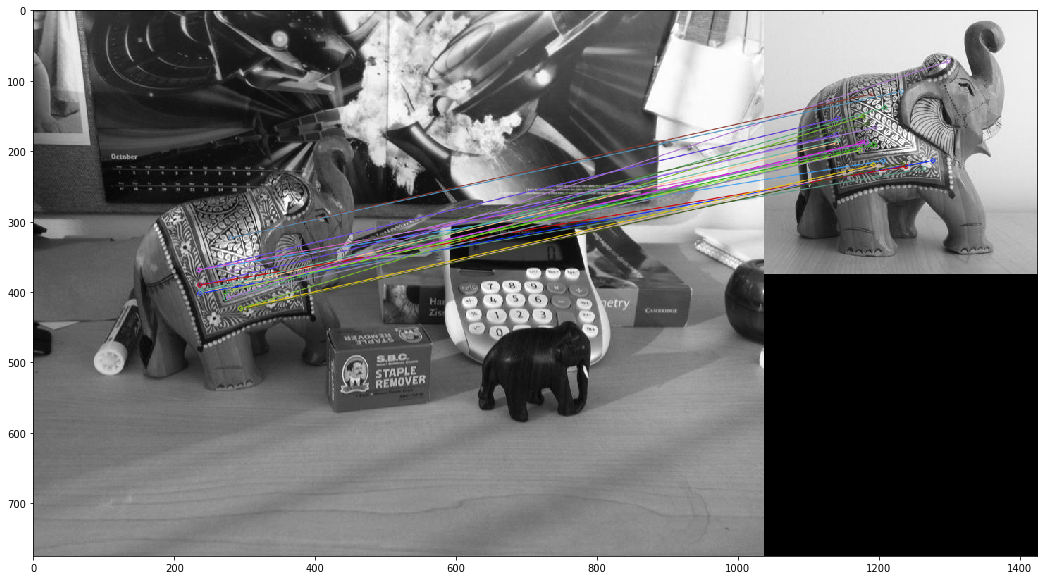

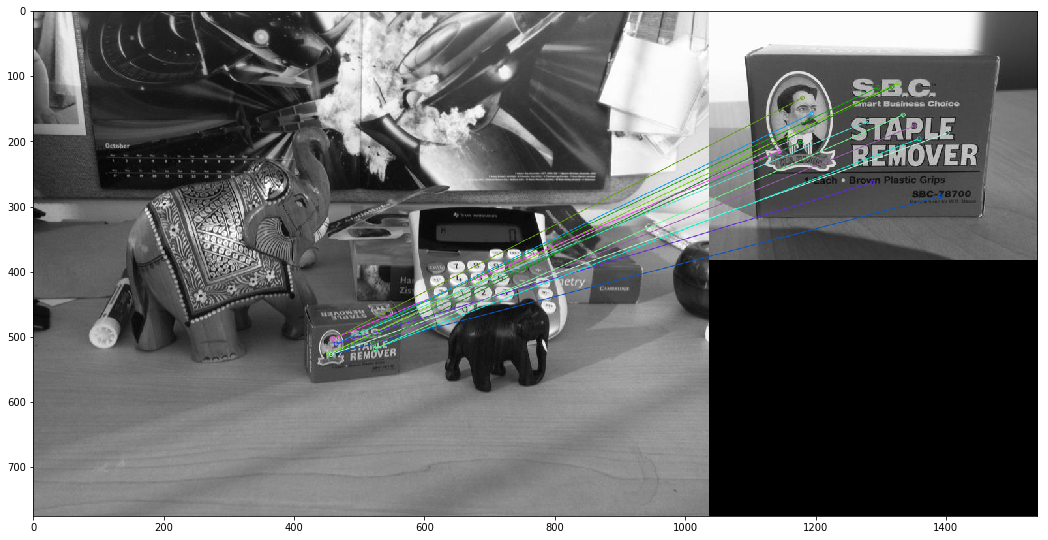

In [7]:
sift = cv2.xfeatures2d.SIFT_create(nfeatures = 0, sigma=1.6, edgeThreshold=10, contrastThreshold=0.04)

kpts_img, des_img = sift.detectAndCompute(img,None)
img_kpts_output = cv2.drawKeypoints(img, kpts_img, outImage=None, flags=4)
kpts_q1, des_q1 = sift.detectAndCompute(q1,None)
q1_kpts_output = cv2.drawKeypoints(q1, kpts_q1, outImage=None, flags=4)
kpts_q2, des_q2 = sift.detectAndCompute(q2,None)
q2_kpts_output = cv2.drawKeypoints(q2, kpts_q2, outImage=None, flags=4)

plt.figure(figsize=(12,12))
plt.imshow(img_kpts_output)
plt.show()
plt.figure(figsize=(8,8))
plt.imshow(q1_kpts_output)
plt.show()
plt.figure(figsize=(8,8))
plt.imshow(q2_kpts_output)
plt.show()

bfm = cv2.BFMatcher()

# for knn match
knnm1 = bfm.knnMatch(des_img,des_q1,k=2)
knnm2 = bfm.knnMatch(des_img,des_q2,k=2)

# max 20 matches
max_matches = 20

# for knn match
matches_img_q1 = list(filter(lambda m : m[0].distance < 0.4 * m[1].distance, knnm1))[:max_matches]
matches_img_q2 = list(filter(lambda m : m[0].distance < 0.3 * m[1].distance, knnm2))[:max_matches]

#matches_img_q1 = sorted(bfm.match(des_img,des_q1),key=lambda x:x.distance)
#matches_img_q2 = sorted(bfm.match(des_img,des_q2),key=lambda x:x.distance)


#for knn match
matches_img_q1_res = cv2.drawMatchesKnn(img,kpts_img,q1,kpts_q1,matches_img_q1,outImg=None,
                          flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
                        
matches_img_q2_res = cv2.drawMatchesKnn(img,kpts_img,q2,kpts_q2,matches_img_q2,outImg=None,
                          flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

#matches_img_q1_res = cv2.drawMatches(img,kpts_img,q1,kpts_q1,matches_img_q1[:20],outImg=None,
#                                     flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
#matches_img_q2_res = cv2.drawMatches(img,kpts_img,q2,kpts_q2,matches_img_q2[:20],outImg=None,
#                                     flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
                        
plt.figure(figsize=(18,18))
plt.imshow(matches_img_q1_res)
plt.show()
plt.figure(figsize=(18,18))
plt.imshow(matches_img_q2_res)
plt.show()

## Good Luck!